
Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

---------------------------------------------------------------------

Decision Tree Model


Target class distribution:
 target
1    0.513171
0    0.486829
Name: proportion, dtype: float64
Decision Tree type: DecisionTreeClassifier

Accuracy: 0.8
Confusion Matrix:
 [[71 31]
 [10 93]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78       102
           1       0.75      0.90      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



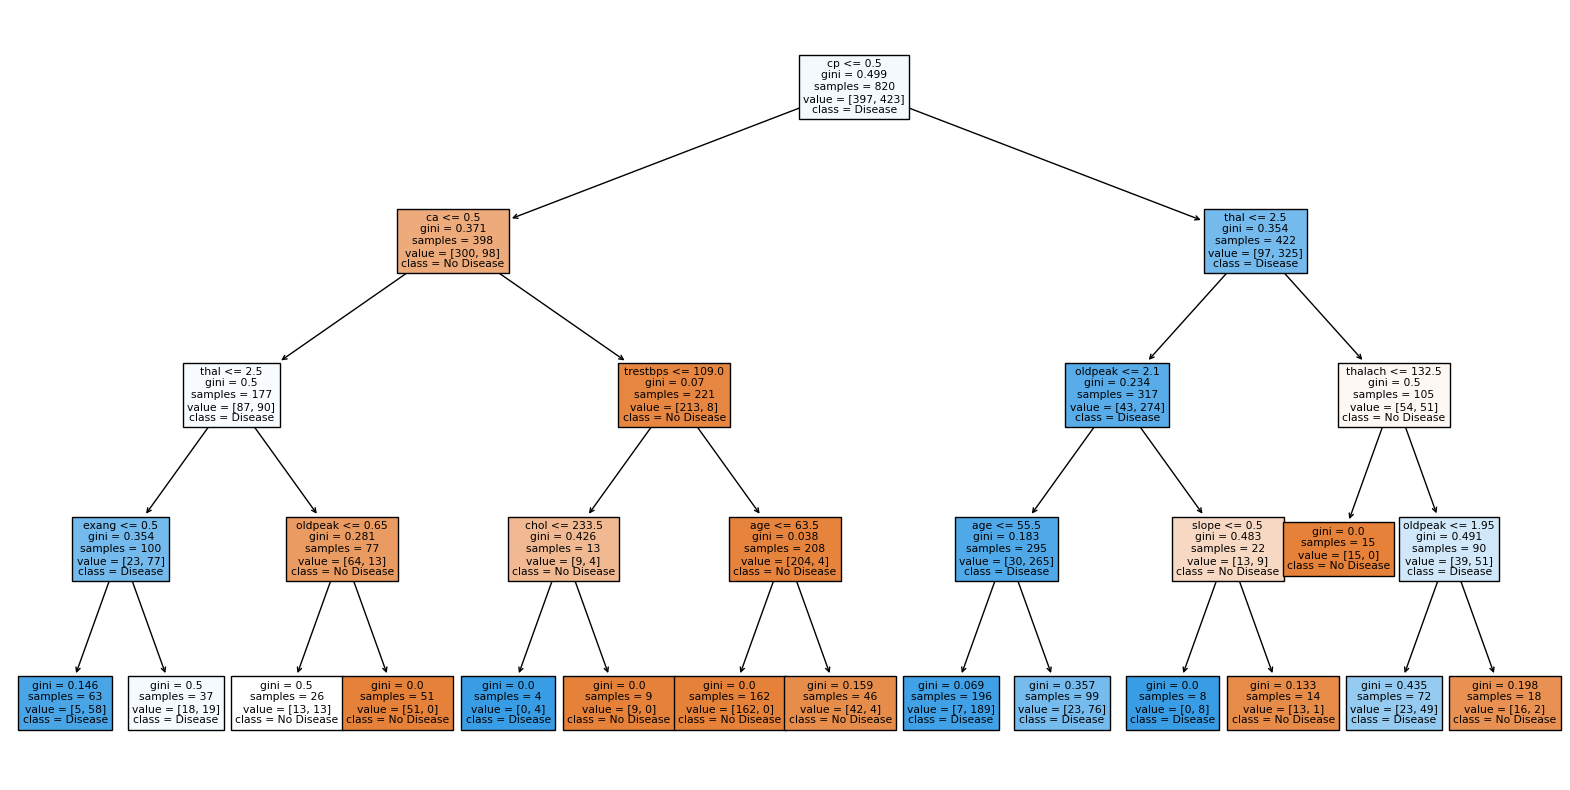

Train accuracy: 0.8829268292682927
Test accuracy: 0.8

Ideal depth testing
Depth 2: Test Accuracy = 0.678
Depth 3: Test Accuracy = 0.780
Depth 4: Test Accuracy = 0.800
Depth 5: Test Accuracy = 0.844
Depth 6: Test Accuracy = 0.883
Depth 7: Test Accuracy = 0.917
Depth 8: Test Accuracy = 0.976
Depth 9: Test Accuracy = 0.980

---------------------------------------------------------------------
Random Forest Model

Train Accuracy: 0.9231707317073171
Test Accuracy: 0.8536585365853658

              precision    recall  f1-score   support

           0       0.90      0.79      0.84       102
           1       0.82      0.91      0.86       103

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205




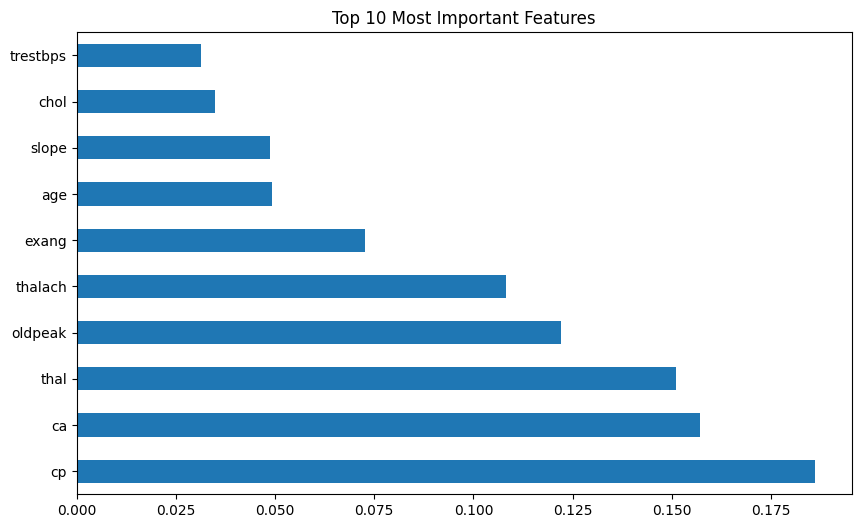


[[81 21]
 [ 9 94]]


Medical Performance Metrics (Class 1 - Disease):
Precision (False Positives): 0.817
Recall (Missed Cases):       0.913
F1-Score:                    0.862

Random Forest CV Accuracy: 0.884 ± 0.038
---------------------------------------------------------------------
Logistic Regression Model

Accuracy: 0.7951219512195122

---------------------------------------------------------------------

Results of Model Accuracies:
Decision Tree Accuracy:        0.800
Random Forest Accuracy:        0.854
Logistic Regression Accuracy:  0.795

 Best Model: Random Forest with accuracy of 0.854


In [7]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


df = pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")
df.head() 
df.describe() 
df.info
print("\nMissing values:\n", df.isnull().sum()) #checking for missing values
#df['Fill in with desired colunm'].value_counts()
print()
print ("---------------------------------------------------------------------")
print()
#decision tree model
print ("Decision Tree Model")
print()
X=df.drop("target",axis=1) #Features
y=df["target"]             #Target (1 = disease, 0 = no disease)
print("\nTarget class distribution:\n", y.value_counts(normalize=True)) #checking for class balence
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Decision Tree type: {type(model).__name__}")
print()
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
#visulization code
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=["No Disease", "Disease"])
plt.show()
#testing for over/under fitting
from sklearn.metrics import accuracy_score
print("Train accuracy:", accuracy_score(y_train, model.predict(X_train)))
print("Test accuracy:", accuracy_score(y_test, model.predict(X_test)))
print()
print ("Ideal depth testing")
#testing for ideal depth 
for d in range(2, 10):
    temp_model = DecisionTreeClassifier(max_depth=d, random_state=42)
    temp_model.fit(X_train, y_train)
    test_acc = accuracy_score(y_test, temp_model.predict(X_test))
    print(f"Depth {d}: Test Accuracy = {test_acc:.3f}")
print()   

print ("---------------------------------------------------------------------")

#random forest model, used to counter overfitting
print ("Random Forest Model")
print()
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5
,min_samples_leaf=10,max_features="sqrt",random_state=42)
rf_model.fit(X_train, y_train)
print("Train Accuracy:", rf_model.score(X_train, y_train))
print("Test Accuracy:", rf_model.score(X_test, y_test))
print()   
# Check new metrics
rf_pred = rf_model.predict(X_test)
print(classification_report(y_test, rf_pred))     
print()
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh', figsize=(10, 6))
plt.title("Top 10 Most Important Features")
plt.show()
print()
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, rf_model.predict(X_test)))
print()
#random forest model diagnostics
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1, _ = precision_recall_fscore_support(y_test, rf_pred, average='binary')
print(f"\nMedical Performance Metrics (Class 1 - Disease):")
print(f"Precision (False Positives): {precision:.3f}")
print(f"Recall (Missed Cases):       {recall:.3f}")  # Most critical!
print(f"F1-Score:                    {f1:.3f}")

#cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print(f"\nRandom Forest CV Accuracy: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

print ("---------------------------------------------------------------------")
#logistic regression model to use for comparison 
print("Logistic Regression Model")
print()
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
print("Accuracy:", accuracy_score(y_test, logreg.predict(X_test)))
print()
print ("---------------------------------------------------------------------")
print()
#model comparison
dt_pred = model.predict(X_test)
rf_pred = rf_model.predict(X_test)
log_pred = logreg.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
rf_acc = accuracy_score(y_test, rf_pred)
log_acc = accuracy_score(y_test, log_pred)
print("Results of Model Accuracies:")
print(f"Decision Tree Accuracy:        {dt_acc:.3f}")
print(f"Random Forest Accuracy:        {rf_acc:.3f}")
print(f"Logistic Regression Accuracy:  {log_acc:.3f}")
#choosing best model
model_scores = {
    "Decision Tree": dt_acc,
    "Random Forest": rf_acc,
    "Logistic Regression": log_acc
}

# Pick and print best model
best_model = max(model_scores, key=model_scores.get)
print()
print(f" Best Model: {best_model} with accuracy of {model_scores[best_model]:.3f}")


# Heart Disease Prediction Project

This project builds and compares three machine learning models — Decision Tree, Random Forest, and Logistic Regression — to predict the presence of heart disease using a dataset of clinical features. I evaluated accuracy, model risk, and performance trade-offs.

## Dataset Overview

The dataset contains clinical information about patients, including age, cholesterol levels, blood pressure, and more. The target column indicates whether the patient has heart disease (`1`) or not (`0`).  
I began by exploring the data to understand its structure and quality. After reviewing it using `.head()`, `.describe()`, and `.info()`, I moved into model training.

## Model Training

In this project, I trained three different models — each with its own strengths and weaknesses — with the goal of selecting the one with the highest accuracy.  
The data was split into training and testing sets and used to build:

- **Decision Tree**: Simple and interpretable, but prone to overfitting
- **Random Forest**: Ensemble of trees that generalize better and reduce overfitting
- **Logistic Regression**: A linear baseline model

## Decision Tree Evaluation

The decision tree achieved solid accuracy, but as expected, it overfit the training data when not properly tuned. I limited the depth to control complexity and compared training vs. test accuracy.

## Decision Tree Depth Tuning

I tested various `max_depth` values to find a balance between underfitting and overfitting. A depth of 7 gave the best trade-off between complexity and performance.

## Random Forest Evaluation

The Random Forest model leverages multiple decision trees trained on random subsets of the data. It outperformed the single decision tree by reducing overfitting and improving generalization.

## Random Forest Depth Tuning

I varied `max_depth` from 4 to 15 to measure how tree depth affected Random Forest performance. This helped identify the optimal complexity for the model.

## Logistic Regression Evaluation

Logistic Regression is a linear model that works best when class boundaries are linearly separable. It performed worst among the models, as expected, due to the non-linear nature of the data.

## Model Comparison

I compared the accuracy of all three models. The Random Forest performed the best due to its ensemble nature and ability to reduce overfitting.  
Decision Tree performed well but showed signs of overfitting. Logistic Regression underperformed due to its simplicity and linear assumptions.

## Conclusion

Random Forest achieved the highest test accuracy of **85.4%**, confirming its ability to generalize well on structured health data.  
This project highlights the importance of model tuning, especially for tree-based methods, and shows the trade-offs between interpretability and predictive power.